In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import cv2
import os
import PIL 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
tf.config.experimental.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [3]:
train_dir = "C:/Users/ys726/Desktop/DL/datasets/intel/seg_train"

In [4]:
import pathlib
train_dir = pathlib.Path(train_dir)
train_dir

WindowsPath('C:/Users/ys726/Desktop/DL/datasets/intel/seg_train')

In [5]:
image_count = len(list(train_dir.glob('*/*.jpg')))
image_count

14034

In [6]:
buildings = list(train_dir.glob('buildings/*'))
glacier = list(train_dir.glob('glacier/*'))
buildings[:5]

[WindowsPath('C:/Users/ys726/Desktop/DL/datasets/intel/seg_train/buildings/0.jpg'),
 WindowsPath('C:/Users/ys726/Desktop/DL/datasets/intel/seg_train/buildings/10006.jpg'),
 WindowsPath('C:/Users/ys726/Desktop/DL/datasets/intel/seg_train/buildings/1001.jpg'),
 WindowsPath('C:/Users/ys726/Desktop/DL/datasets/intel/seg_train/buildings/10014.jpg'),
 WindowsPath('C:/Users/ys726/Desktop/DL/datasets/intel/seg_train/buildings/10018.jpg')]

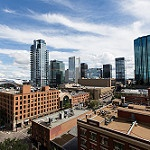

In [7]:
PIL.Image.open(buildings[1])

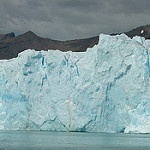

In [8]:
PIL.Image.open(glacier[5])

In [9]:
intel_image_dict = {
    'buildings' : list(train_dir.glob('buildings/*')),
    'forest' : list(train_dir.glob('forest/*')),
    'glacier' : list(train_dir.glob('glacier/*')),
    'mountain' : list(train_dir.glob('mountain/*')),
    'sea' : list(train_dir.glob('sea/*')),
    'street' : list(train_dir.glob('street/*')),
}

In [10]:
intel_image_dict['forest'][:5]

[WindowsPath('C:/Users/ys726/Desktop/DL/datasets/intel/seg_train/forest/10007.jpg'),
 WindowsPath('C:/Users/ys726/Desktop/DL/datasets/intel/seg_train/forest/10010.jpg'),
 WindowsPath('C:/Users/ys726/Desktop/DL/datasets/intel/seg_train/forest/10020.jpg'),
 WindowsPath('C:/Users/ys726/Desktop/DL/datasets/intel/seg_train/forest/10030.jpg'),
 WindowsPath('C:/Users/ys726/Desktop/DL/datasets/intel/seg_train/forest/10037.jpg')]

In [11]:
intel_labels_dict = {
    'buildings':0,
    'forest':1,
    'glacier':2,
    'mountain':3,
    'sea':4,
    'street':5
}

int_to_label = {v: k for k, v in intel_labels_dict.items()}

In [12]:
# Using CV2 module to read this image file into openCV object (convering image into 3D numpy array)
img = cv2.imread(str(intel_image_dict['forest'][0]))
img.shape

(150, 150, 3)

In [13]:
#cv2.resize(img,(180,180)).shape

In [14]:
# Creating the dataset X contains flower images (3D numpy array) and y contains flower name (flower number)
X, y = [], []
for name, images in intel_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_image = cv2.resize(img,(64,64))
        X.append(resized_image)
        y.append(intel_labels_dict[name])


In [15]:
# Converting list into numpy array
X = np.array(X)
y = np.array(y)

In [16]:
X = X/255

In [17]:
def plot_sample(X, y, index):
    plt.figure(figsize=(10,1))
    plt.imshow(X[index])
    plt.xlabel(int_to_label[y[index]])

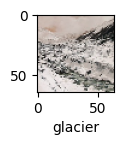

In [18]:
plot_sample(X, y, 5001)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [20]:
print(len(X_train))
print(len(X_test))

10525
3509


In [21]:
# X_train_scaled = X_train/255
# X_test_scaled = X_test/255

In [22]:
print(X_train.shape)
f"input layer size = {64*64*3}"

(10525, 64, 64, 3)


'input layer size = 12288'

## CNN

In [23]:
model = tf.keras.Sequential([
    #CNN
    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)),
    layers.MaxPool2D(), # Default size = (2,2)
    layers.BatchNormalization(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.BatchNormalization(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.BatchNormalization(),

    # Dense Network
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(6, activation="softmax")

])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 31, 31, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                        

In [25]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
329/329 [==============================] - 11s 6ms/step - loss: 1.1907 - accuracy: 0.6070
Epoch 2/20
329/329 [==============================] - 2s 6ms/step - loss: 0.7339 - accuracy: 0.7373
Epoch 3/20
329/329 [==============================] - 2s 6ms/step - loss: 0.5689 - accuracy: 0.7962
Epoch 4/20
329/329 [==============================] - 2s 6ms/step - loss: 0.4839 - accuracy: 0.8257
Epoch 5/20
329/329 [==============================] - 2s 6ms/step - loss: 0.4011 - accuracy: 0.8561
Epoch 6/20
329/329 [==============================] - 2s 6ms/step - loss: 0.3351 - accuracy: 0.8805
Epoch 7/20
329/329 [==============================] - 2s 6ms/step - loss: 0.3036 - accuracy: 0.8924
Epoch 8/20
329/329 [==============================] - 2s 6ms/step - loss: 0.2624 - accuracy: 0.9045
Epoch 9/20
329/329 [==============================] - 2s 6ms/step - loss: 0.2216 - accuracy: 0.9245
Epoch 10/20
329/329 [==============================] - 2s 6ms/step - loss: 0.1989 - accuracy: 0.929

In [26]:
model.evaluate(X_test, y_test)

110/110 [==============================] - 1s 4ms/step - loss: 1.8917 - accuracy: 0.6666


[1.8916794061660767, 0.6665716767311096]

In [27]:
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]
y_pred[:5]

110/110 [==============================] - 0s 3ms/step


[2, 0, 0, 0, 4]

In [28]:
y_test[:5]

array([2, 0, 5, 5, 3])

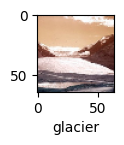

In [29]:
plot_sample(X_test, y_test, 0)

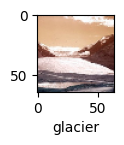

In [30]:
plot_sample(X_test, y_pred, 0)

## Data Augmentation

In [31]:
# Data Augmentation
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',
                                                 input_shape=(64,64,3)),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomRotation(0.1)
])
tf.get_logger().setLevel('ERROR')

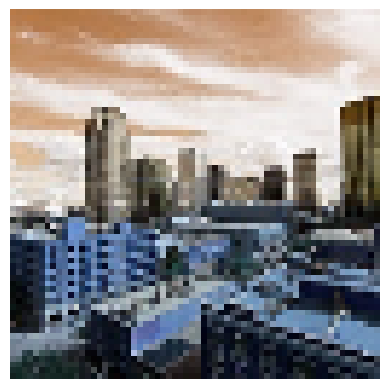

In [32]:
plt.axis('off')
plt.imshow(X[1])

In [34]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

## CNN With Data Augmentation

In [35]:
model_da = tf.keras.Sequential([
    # Data Augmentation
    data_augmentation,
    
    #CNN
    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)),
    layers.MaxPool2D(), # Default size = (2,2)
    layers.BatchNormalization(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.BatchNormalization(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.BatchNormalization(),

    # Dense Network
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(6, activation="softmax")

])

model_da.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [36]:
model_da.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 64, 64, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 31, 31, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 31, 31, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)      

In [37]:
model_da.fit(X_train, y_train, epochs=5)

Epoch 1/5
329/329 [==============================] - 54s 158ms/step - loss: 1.3174 - accuracy: 0.5626
Epoch 2/5
329/329 [==============================] - 53s 160ms/step - loss: 0.9699 - accuracy: 0.6498
Epoch 3/5
329/329 [==============================] - 52s 158ms/step - loss: 0.8525 - accuracy: 0.6911
Epoch 4/5
329/329 [==============================] - 52s 158ms/step - loss: 0.7901 - accuracy: 0.7112
Epoch 5/5
329/329 [==============================] - 51s 155ms/step - loss: 0.7281 - accuracy: 0.7365


In [38]:
model_da.evaluate(X_test, y_test)

110/110 [==============================] - 0s 3ms/step - loss: 0.7315 - accuracy: 0.7509


[0.7314944863319397, 0.7509261965751648]

In [40]:
y_pred_da = model_da.predict(X_test)
y_pred_da = [np.argmax(i) for i in y_pred_da]
y_pred_da[:5]

110/110 [==============================] - 1s 4ms/step


[2, 0, 0, 5, 3]

In [41]:
y_test[:5]

array([2, 0, 5, 5, 3])

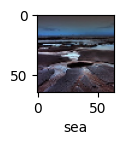

In [49]:
plot_sample(X_test, y_test, 168)

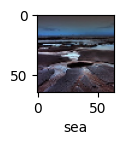

In [48]:
plot_sample(X_test, y_pred_da, 168)